<a href="https://colab.research.google.com/github/choiitea/Choi_DSPN_S24/blob/main/Exercise16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [79]:
# WRITE YOUR CODE HERE
# random seed 1997
set.seed(1997)
# parameters for generating data
n <- 100
random_coef <- runif(4, min = -3, max = 3)
#random_coef
# -1.6716605569236 0.789223083760589 1.90374576766044 1.54804862150922
# simplifying for my convenience
beta0 <- -1.67
beta1 <- 0.79
beta2 <- 1.9
beta3 <- 1.55

# Generate data
X <- rnorm(n)
e <- rnorm(n, mean = 0, sd = 0.5)
Y <- beta0 + beta1*X + beta2*X^2 + beta3*X^3 + e

data <- data.frame(Y = Y, X = X)

head(data)

,Y,X
,<dbl>,<dbl>
1,-2.156658,-1.1066080
2,-1.407943,-0.1120660
3,-4.816910,-1.7375028
4,-1.137927,0.2295856
5,5.590512,1.2597499
6,-1.213036,0.4484742


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [80]:
# WRITE YOUR CODE HERE
#install.packages("leaps")
library(leaps)
#?regsubsets

# I guess I need to create the predictor variables X^2 to X^10
data$X2 <- data$X^2
data$X3 <- data$X^3
data$X4 <- data$X^4
data$X5 <- data$X^5
data$X6 <- data$X^6
data$X7 <- data$X^7
data$X8 <- data$X^8
data$X9 <- data$X^9
data$X10 <- data$X^10

regfit.full = regsubsets(Y~., data) #use every variable
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Y ~ ., data)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 ) " " " " "*" " " " " " " " " " " " " " "
2  ( 1 ) " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 ) "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 ) "*" "*" "*" " " "*" " " " " " " " " " "
5  ( 1 ) "*" "*" "*" "*" " " "*" " " " " " " " "
6  ( 1 ) "*" "*" "*" " " "*" " " "*" " " "*" " "
7  ( 1 ) "*" "*" "*" "*" "*" " " "*" " " "*" " "
8  ( 1 ) "*" "*" "*" "*" "*" "*" " " "*" " " "*"

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

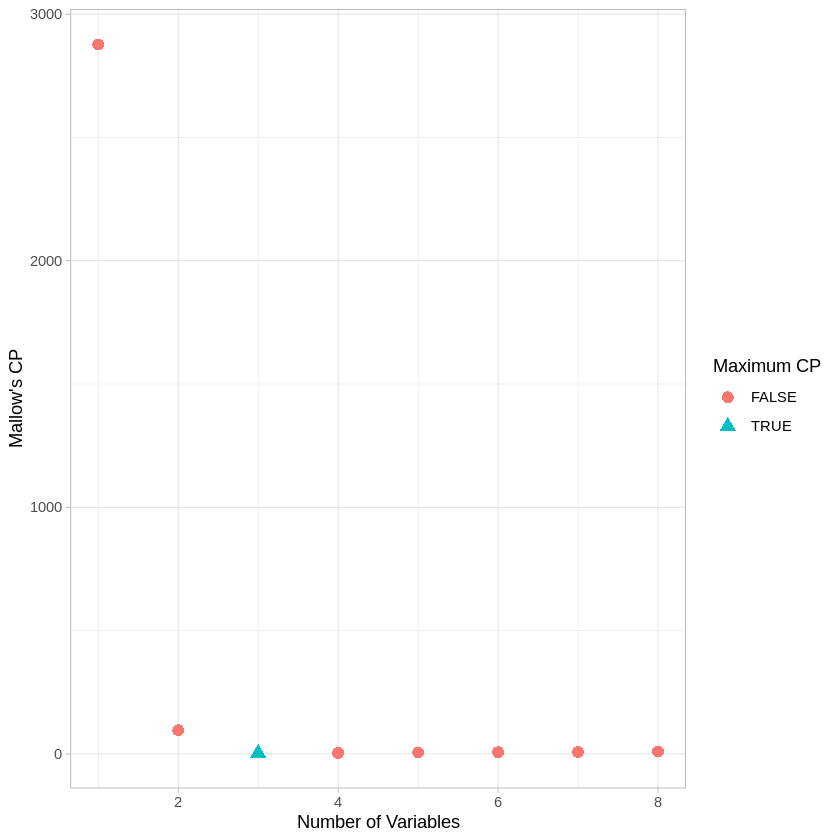

In [81]:
# WRITE YOUR CODE HERE
library(tidyverse)
reg.summary = summary(regfit.full)
numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19.
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

# mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

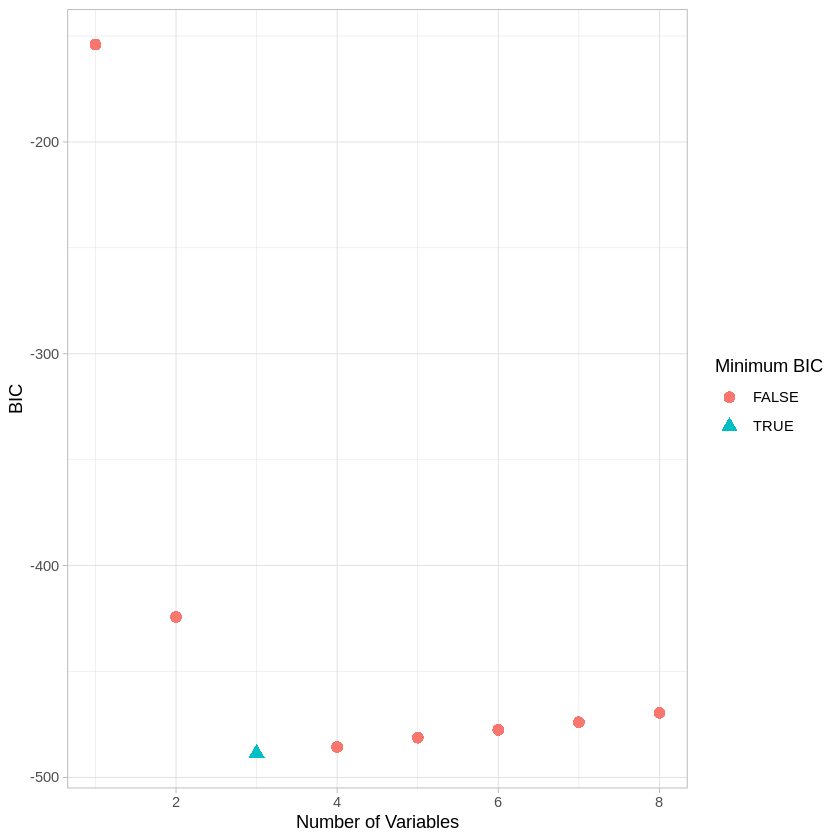

In [82]:
# #bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

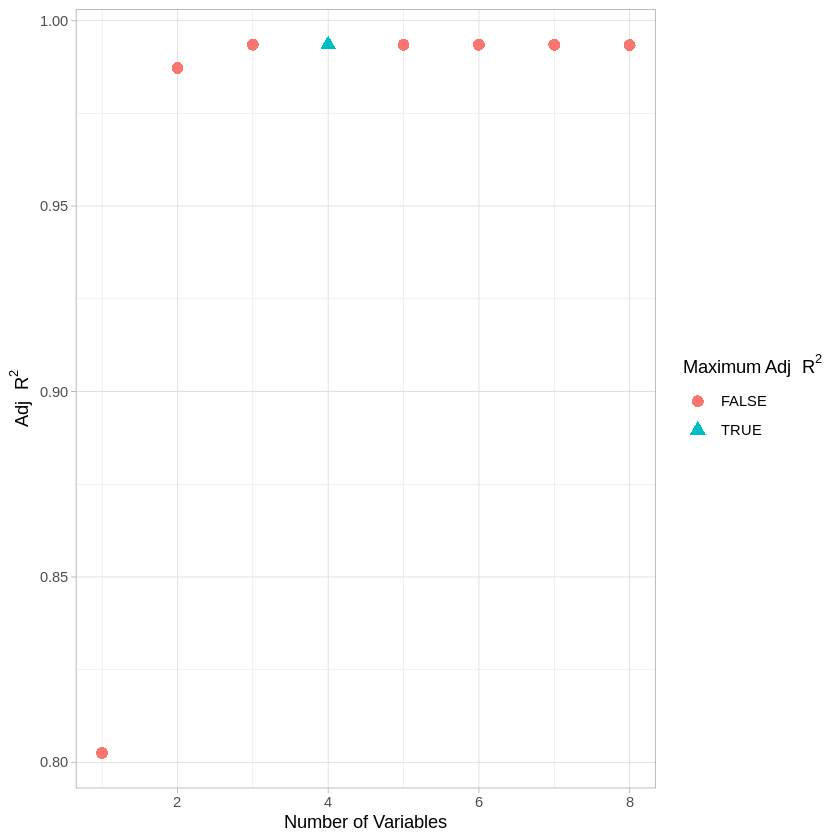

In [83]:
# adjusted R2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

In [84]:
# identify which model has the best bias-adjusted fit
which.min(reg.summary$cp)
which.min(reg.summary$bic)
which.max(reg.summary$adjr2)

# let's pull out the coefficients
coef(regfit.full, 3)

[1] 3

[1] 3

[1] 4

(Intercept)           X          X2          X3 
 -1.7786056   0.7654889   1.9915437   1.5672000

> *Write your response here*
> In looking at model selected based on Mallow's Cp, BIC, and adjusted $R^2$, we first see that there is disagreement between adjusted $R^2$ and Cp and BIC. While Cp and BIC point to the model with 3 parameters, adjusted $R^2$ prefers the model with 4 parameters. It's important to note here that we do not only choose the model with smaller dimensions just because sparsity is always preferred. It should be noted that adjusted $R^2$ is choosing the model with 4 parameters because it is trying to maximize the variance explained by the model. We choose the model with lower complexity here because maximially explaining the variance within the data is not necessarily the primary goal (assuming that the primary goal is generalizable inference).\
The betas I chose in this 'true' model I created were: beta0 <- -1.67, beta1 <- 0.79, beta2 <- 1.9, beta3 <- 1.55. The best model chosen through bias-adjusted fit comparison produces coefficients that are very close to the 'true' values.

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

In [85]:
# WRITE YOUR CODE HERE
regfit.fwd <- regsubsets(Y ~., data = data, method = "forward")
#summary(regfit.fwd)
reg.fwd.summary = summary(regfit.fwd)
which.min(reg.fwd.summary$cp)
which.min(reg.fwd.summary$bic)
which.max(reg.fwd.summary$adjr2)

coef(regfit.fwd, 3)

[1] 3

[1] 3

[1] 4

(Intercept)           X          X2          X3 
 -1.7786056   0.7654889   1.9915437   1.5672000

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

In [86]:
# WRITE YOUR CODE HERE
regfit.bwd <- regsubsets(Y ~., data = data, method = "backward")
#summary(regfit.bwd)
reg.bwd.summary = summary(regfit.bwd)
which.min(reg.bwd.summary$cp)
which.min(reg.bwd.summary$bic)
which.max(reg.bwd.summary$adjr2)

coef(regfit.bwd, 6)

[1] 6

[1] 6

[1] 8

(Intercept)             X            X2            X5            X7 
-1.7945684631  1.5061126432  1.9761539058  0.9072964566 -0.1862146657 
           X9           X10 
 0.0119835636  0.0002032218

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> Forward stepwise selection produced the same results as those of question 1, but backward stepwise selection chose the model with 6 parameters. This is due to how the predictors are created - remember that X2 is $x^2$, X3 is $x^3$ and so on. This means that the predictor variables have high collinearity. In a backward stepwise selection this means that the algorithm stops removing terms earlier, resulting in a model with more predictors compared to forward stepwise or best subset selection.
>

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [97]:
# WRITE YOUR CODE HERE
set.seed(1997)
# parameters
n <- 1000
p <- 20

beta <- runif(p, min = -2, max = 2) # vector of length 20.
beta[sample(1:p, 10)] <- 0  # setting half of them to 0
beta

dat <- matrix(rnorm(n * p), nrow = n, ncol = p)
colnames(dat) <- paste0("x", 1:20)

e <- rnorm(n, mean = 0, sd = 0.5)

y <- colSums((t(dat) * beta)) + e

dat <- data.frame(dat)
dat$y <- y

head(dat)

train <- dat[1:100, ]
test <- dat[101:1000, ]

[1] -1.1144404  0.5261487  0.0000000  1.0320324 -1.4630731  0.5151450
 [7]  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000 -0.5277565
[13]  0.0000000 -1.8994980  0.0000000 -0.7120220  0.0000000  0.0000000
[19] -1.5538191 -0.6799672

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.6121462,-0.06232354,-0.8529892,-0.6289533,-1.25375539,0.2784459,-0.85727115,-1.0380393,-0.07431788,1.1696039,⋯,-0.284183231,-0.04692446,0.75231624,-0.2388338,0.5859516,-0.5788594,0.3542662,-0.1278698,0.12284860,-2.3572036
2,-0.5912932,-0.85956918,0.4191234,-0.4400123,-1.10531031,-0.6212755,-1.04795561,0.5394848,0.31067039,0.3045565,⋯,0.005294635,-0.79788145,-0.62964470,0.8261991,-1.1866012,2.7034960,-0.1840551,0.4347243,-0.99645577,3.2827437
3,-0.7221665,0.77325349,0.6327792,0.3279123,0.58771375,0.9466239,1.35191122,-0.8663276,0.91656613,1.8614002,⋯,1.585804018,0.46803560,-1.43875859,-0.9038115,2.3467646,-0.8134583,-0.9581906,1.3986076,-0.08577181,-0.1969125
4,-2.3762106,-0.73012714,1.2426104,-0.9584096,0.08107354,0.7792539,-0.64568154,-0.4262454,1.11165865,-0.8757133,⋯,0.594952882,-0.34141192,1.17840045,0.6768907,1.8649899,-0.7013750,-1.8685490,-0.7044939,-0.12502707,-1.0820421
5,-0.6461708,-1.19135815,-0.7292524,0.3907425,0.45241382,-2.1570203,-0.46927108,-0.7344011,-1.19135498,0.5722186,⋯,1.240175029,-1.78038509,0.70213007,0.2696388,0.1367579,1.0203101,1.1488594,0.1038445,0.51248933,-4.4028769
6,-0.7254025,-0.01360758,-1.1735859,0.9665259,0.77204310,-1.6154565,0.09176664,1.3567897,-0.42705313,0.0141786,⋯,-0.717254831,0.21792386,0.01006601,1.1869282,1.2060878,-0.7245896,-1.5859460,-0.2024745,-0.90069934,1.0594188


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

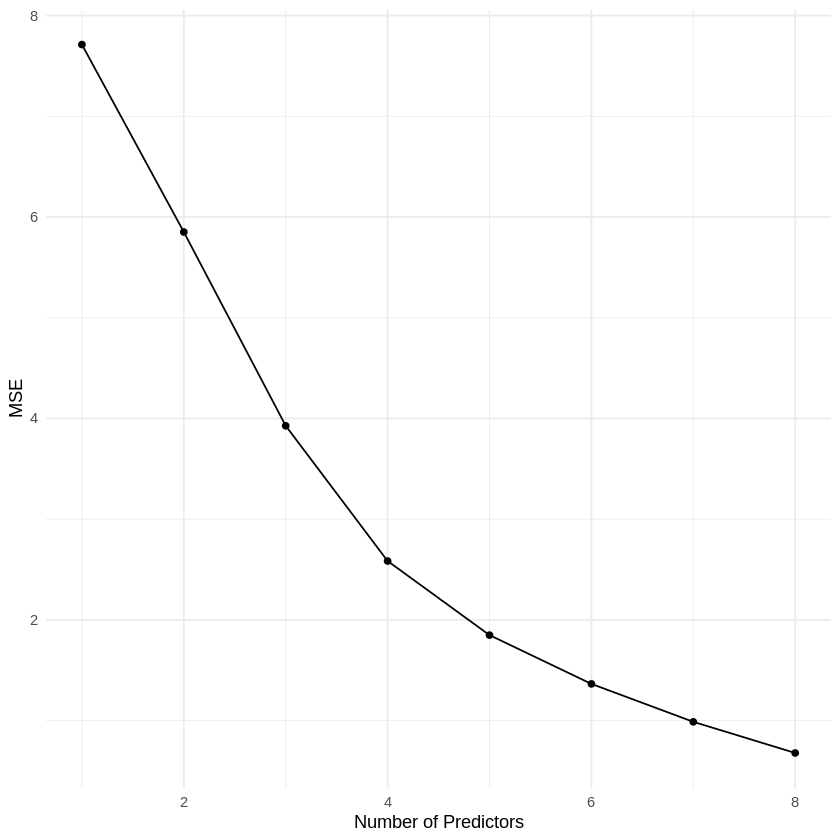

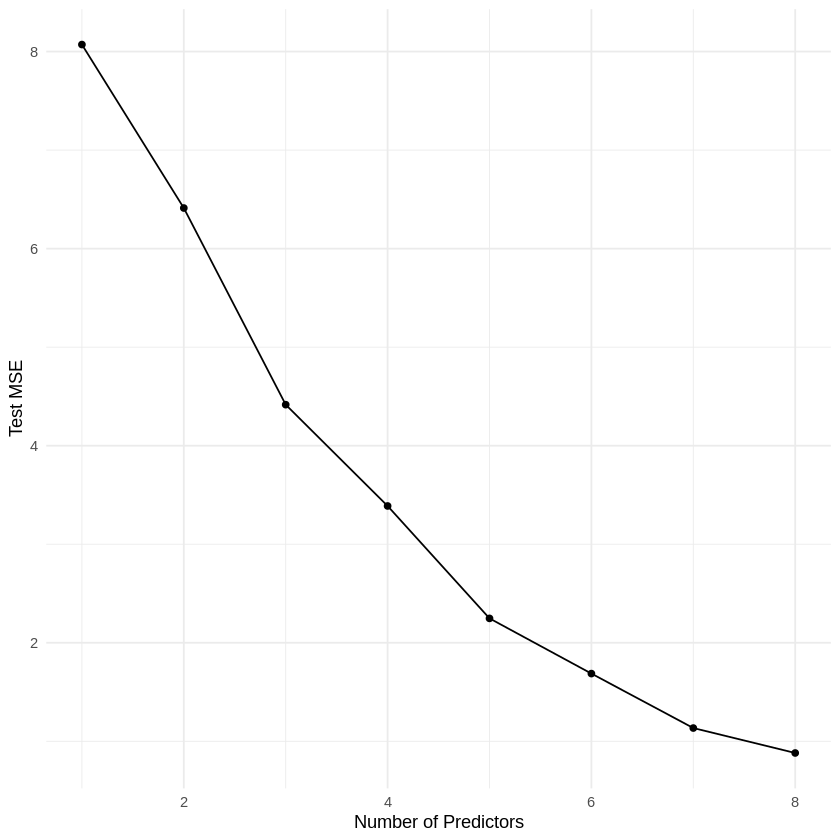

In [95]:
# WRITE YOUR CODE HERE
train_fit <- regsubsets(y ~ ., data = train)
#summary(train_fit)
train_fit_summary <- summary(train_fit)

train_plot_data <- data.frame(num_pred <- 1:length(train_fit_summary$rss),
                        mse <- train_fit_summary$rss / 100)

ggplot(train_plot_data, aes(x = num_pred, y = mse)) +
  geom_line() +
    geom_point() +
    xlab("Number of Predictors") +
    ylab("MSE") +
    theme_minimal()

test_mat = model.matrix(y~., data = test)
test_mse = rep(NA,length(train_fit_summary$rss))

for(i in 1:length(train_fit_summary$rss)){

    # extract the coefficients
    coefi = coef(train_fit, i)

    # make predictions using matrix multiplication of the test matirx and the coefficients vector
    pred = test_mat[,names(coefi)]%*%coefi

    # Calculate the MSE
    test_mse[i] = mean((test$y-pred)^2)
}

test_plot_data <- data.frame(num_pred = 1:length(test_mse),
                             mse = test_mse)

# Plot the test MSE data
ggplot(test_plot_data, aes(x = num_pred, y = mse)) +
  geom_line() +
    geom_point() +
      xlab("Number of Predictors") +
        ylab("Test MSE") +
          theme_minimal()

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [98]:
# WRITE YOUR CODE HERE
which.min(test_mse)
coef(train_fit, 8)
# -1.1144403712824 0.52614872250706 0 1.03203241433948 -1.46307313907892 0.51514502428472 0 0 0 0 0 -0.527756507508457 0 -1.89949801936746 0 -0.712022013962269 0 0 -1.55381905566901 -0.679967186413705
# x1, x2, x4, x5, x6, x12, x14, x16, x19, x20

the best model accoridng to test MSE missed two features from the true model that was used to simulate the dataset (x6 which is meant to be -1.46307313907892, and -0.527756507508457).

[1] 8

(Intercept)          x1          x2          x4          x5         x14 
 -0.1384329  -1.1191938   0.5830951   0.9615708  -1.5035033  -1.8391753 
        x16         x19         x20 
 -0.6314228  -1.6292041  -0.7334436

> *Write your response here*
>

**DUE:** 5pm EST, April 8, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*